# Yelp Advice (City & postive/negative)

Author: Ruixuan Zhao

### For Top Ten City

In [0]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['Colab Notebooks',
 'STAT628_module2.gslides',
 'Yelp_Review',
 '回归分析方法及其在实验研究与设计中的应用.gslides',
 'yelp.jpg',
 'Yelp_advice.ipynb',
 'Yelp_City&postive negative.ipynb',
 'Yelp_Summary.ipynb',
 'Yelp_2_group4.gslides']

In [0]:
import nltk
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download("stopwords")

stopwords = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Our Data

In [0]:
review_word = pd.read_csv("Yelp_Review/mexican_review_p.csv")
review_word.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,2015-04-01 16:30:00,love chinese food love mexican food go wrong c...,1,7,1
1,S337tATeouQJdoPYyir29w,2mxBNBeFrgDszqGS5tdEHA,d_L-rfS1vT3JMzgCUGtiow,5.0,2016-07-25 03:57:19,pick meat planet chef make mexican style dish ...,0,0,0
2,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,2018-05-28 20:56:05,party 3 order fish tacos pork belly banh mi co...,1,0,1
3,CvJy7CdHJqsZNq22fUF7hA,DAssyKNnYBenf0s1uP5iRw,dInxwF8kXVdfLEGTIBRrSw,2.0,2017-04-30 04:13:18,employees busy chat one employee head drive th...,0,1,0
4,a6N51Ov3NEchmqsquNGtMA,qpYllTutvfoKvT5OEl7gGQ,HkbNItNrnXlNo59M0YyoMg,5.0,2016-09-30 19:51:43,come loco mill since open love come especially...,0,0,0


In [0]:
info = pd.read_csv("Yelp_Review/mexican_info.csv")
info.head()

,business_id,name,city,latitude,longitude,star,review_count
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,33.495194,-112.028588,3.0,18
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,36.195615,-115.040529,4.5,184
2,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,Toronto,43.666181,-79.316468,3.5,43
3,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,Chandler,33.261325,-111.790815,4.0,84
4,jScBTQtdAt-8RshaiBEHgw,Served,Henderson,36.010745,-115.064803,4.5,664


## Select business id
Select business id in a particular city.

When the review_counts < min_counts, we don't select this business id.

In [0]:
def find_bus(city,info,min_count):
  #bus=info[info['city']==city]
  bus_all=info[info['city']==city]
  bus_id=bus_all[bus_all['review_count']>min_count]['business_id']
  return (bus_id)

# Find reviews in a particular city


In [0]:
def find_city_review(bus_id,review_word):
  review=[]
  for id in bus_id:
    rev = review_word['text'][review_word['business_id']==id]
    try:
      revAll = " ".join(i for i in rev)
    except:
      print(id)
    review.append(revAll)
  review_city_f =  " ".join(j for j in review)
  return (review_city_f)

# Find words around keywords(this keywords means postive/negative words)

around: it is a number which determines how many words we select as nearby words.

In [0]:
def find_word_near(city_review,keyword,around):
  words = word_tokenize(city_review)
  index = []
  num = 0
  for word in words:
    num = num + 1
    if (word == keyword):
      index.append(num)
  res_words = []
  for id in index:
    res_words = res_words + words[(id-around):(id+around):1]
  result =  " ".join(j for j in res_words)
  result_f = word_tokenize(result)
  fdist = FreqDist(result_f)
  return(fdist)


## Get the frequency of words around positive/negative words

In [0]:
def obtain_result(city,info,min_count,review_word,keyword,post,neg,around):
  city_bus = find_bus(city,info,min_count)
  city_review = find_city_review(city_bus,review_word)
  fdistp = find_word_near(city_review,post,around)
  fdistn = find_word_near(city_review,neg,around)
  postive = fdistp[keyword]/fdistp[post]/around/2
  negative = fdistn[keyword]/fdistn[neg]/around/2
  ratio = postive/negative
  return(postive,negative,ratio)


In [0]:
def obtain_result2(city,info,min_count,review_word,keyword,post,neg,around):
  city_bus = find_bus(city,info,min_count)
  city_review = find_city_review(city_bus,review_word)
  fdistp = find_word_near(city_review,post,around)
  fdistn = find_word_near(city_review,neg,around)
  postive = fdistp[keyword]/fdistp[post]/around/2
  negative = fdistn[keyword]/fdistn[neg]/around/2
  ratio = postive/negative
  return(postive,negative,ratio)


## Mesa


In [0]:
Mesa_bus = find_bus("Mesa",info, 100)
Mesa_review = find_city_review(Mesa_bus,review_word)

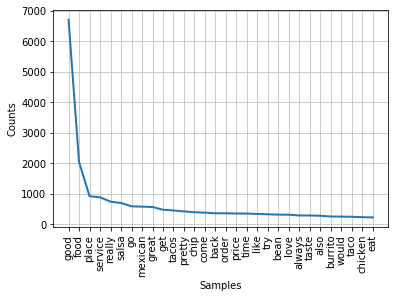

In [0]:
Mesa_near = find_word_near(Mesa_review,'good',5)
Mesa_near.plot(30,cumulative=False)
plt.show()


In [0]:
Mesa_near2 = find_word_near(Mesa_review,'bad',5)

In [0]:
print('place',Mesa_near['place'],Mesa_near2['place'],Mesa_near['good']*10,Mesa_near2['bad']*10)

place 926 102 67040 8040


In [0]:
obtain_result("Mesa",info,100,review_word,'service','good','bad',5)

(0.013275656324582339, 0.016293532338308457, 0.8147807393102443)

In [0]:
obtain_result("Mesa",info,100,review_word,'place','good','bad',5)

(0.013812649164677804, 0.012686567164179105, 1.088761757686368)

In [0]:
obtain_result("Mesa",info,100,review_word,'salsa','good','bad',5)

(0.010501193317422435, 0.004228855721393035, 2.483223360943423)

In [0]:
obtain_result("Mesa",info,100,review_word,'drink','good','bad',5)

(0.0023418854415274463, 0.0029850746268656717, 0.7845316229116945)

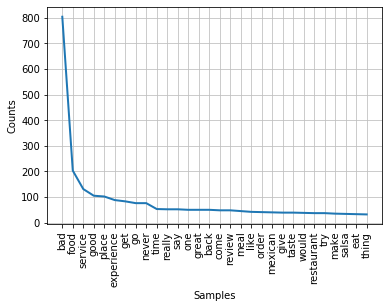

In [0]:
find_word_near(Mesa_review,"bad",5).plot(30,cumulative=False)
plt.show()

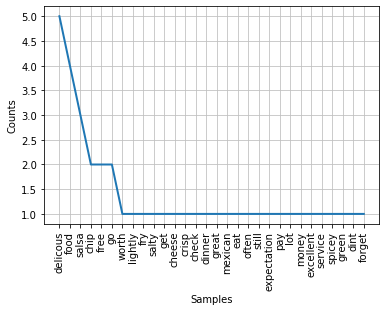

In [0]:
find_word_near(Mesa_review,"delicous",5).plot(30,cumulative=False)
plt.show()

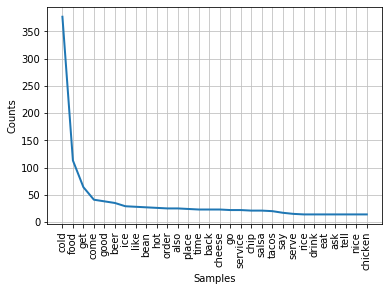

In [0]:
find_word_near(Mesa_review,"cold",5).plot(30,cumulative=False)
plt.show()

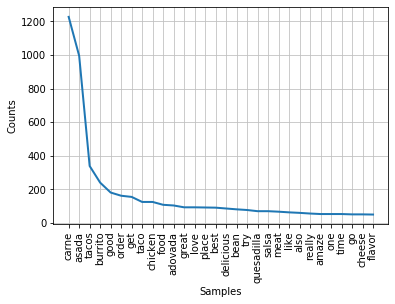

In [0]:
find_word_near(Mesa_review,"carne",5).plot(30,cumulative=False)
plt.show()

## Las Vegas


In [0]:
las_bus = find_bus("Las Vegas",info, 100)
las_review = find_city_review(las_bus,review_word)

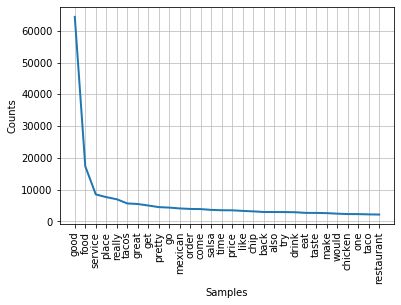

In [0]:
las_near = find_word_near(las_review,'good',5)
las_near.plot(30,cumulative=False)
plt.show()

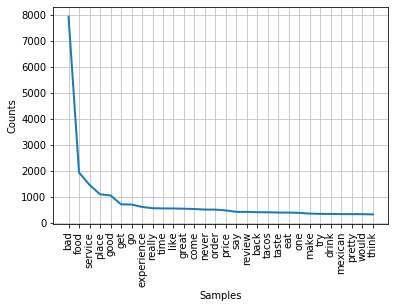

In [0]:
las_near2 = find_word_near(las_review,'bad',5)
las_near2.plot(30,cumulative=False)
plt.show()

In [0]:
print('service',las_near['service'],las_near2['service'],las_near['good']*10,las_near2['bad']*10)

service 8479 1450 643720 79190


In [0]:
obtain_result("Las Vegas",info,100,review_word,'service','good','bad',5)

(0.013171875970919034, 0.01831039272635434)

In [0]:
obtain_result("Las Vegas",info,100,review_word,'place','good','bad',5)

(0.01183899832225191, 0.013726480616239425)

In [0]:
obtain_result("Las Vegas",info,100,review_word,'salsa','good','bad',5)

(0.0055940471012241345, 0.0030180578355853012)

In [0]:
obtain_result("Las Vegas",info,100,review_word,'carne','good','bad',5)

(0.0016793015596843347, 0.0010481121353706276)

## Others

In [0]:
bus0 = find_bus("Scottsdale",info, 100)
review0 = find_city_review(bus0,review_word)
near0 = find_word_near(review0,'good',5)
near20 = find_word_near(review0,'bad',5)


In [0]:
print('chip',near0['chip'],near20['chip'],near0['good']*10,near20['bad']*10)

chip 1086 95 187080 22440


# Phoenix

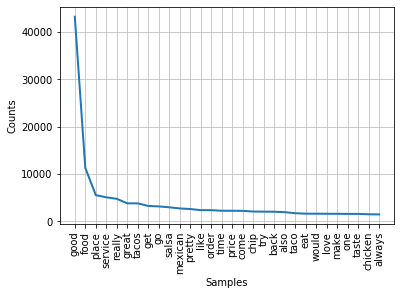

In [0]:
bus = find_bus("Phoenix",info, 100)
review = find_city_review(bus,review_word)
near = find_word_near(review,'good',5)
near.plot(30,cumulative=False)
plt.show()

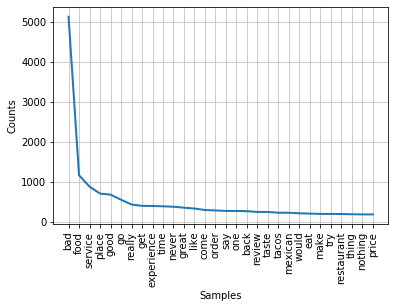

In [0]:
near2 = find_word_near(review,'bad',5)
near2.plot(30,cumulative=False)
plt.show()

In [0]:
print('service',near['service'],near2['service'],near['good']*10,near2['bad']*10)

service 5080 886 431910 51230


In [0]:
print('chip',near['chip'],near2['chip'],near['good']*10,near2['bad']*10)

chip 2075 134 431910 51230


In [0]:
print('tacos',near['tacos'],near2['tacos'],near['good']*10,near2['bad']*10)

tacos 3801 234 431910 51230


In [0]:
print('price',near['price'],near2['price'],near['good']*10,near2['bad']*10)

price 2238 192 431910 51230


In [0]:
print('place',near['place'],near2['place'],near['good']*10,near2['bad']*10)

place 5538 712 431910 51230


In [0]:
print('salsa',near['salsa'],near2['salsa'],near['good']*10,near2['bad']*10)

salsa 2967 173 431910 51230


In [0]:
obtain_result("Phoenix",info,100,review_word,'service','good','bad',5)

(0.01176170961542914, 0.017294553972281863, 0.6800816970636964)

In [0]:
obtain_result("Phoenix",info,100,review_word,'place','good','bad',5)

(0.012822115718552476, 0.01389810657817685, 0.9225800396930384)

In [0]:
obtain_result("Phoenix",info,100,review_word,'chip','good','bad',5)

(0.004804241624412493, 0.0026156548897130587, 1.8367261076018808)

In [0]:
obtain_result("Phoenix",info,100,review_word,'tacos','good','bad',5)

(0.008800444537056331, 0.004567636150692953, 1.9266956138179312)

In [0]:
obtain_result("Phoenix",info,100,review_word,'price','good','bad',5)

(0.005181635062860318, 0.0037478040210813975, 1.382578980574657)

In [0]:
obtain_result("Phoenix",info,100,review_word,'salsa','good','bad',5)

(0.006869486698617767, 0.0033769275814952175, 2.034241639134036)

## After getting result, we do two proportions z-test(binomial test) in R.